Implementieren Sie ein Feedforward MLP mit mindestens einer versteckten Schicht. Nutzen Sie die Cross-Entropy Verlustfunktion.

(2P) Implementieren Sie die Forwärtspropagation. Nutzen Sie als Aktivierungsfunktion in der Ausgangsschicht
g
(
z
)
=
1
1
+
e
−
z
 und in der versteckten Schicht
g
(
z
)
=
R
e
L
U
(
z
)
.

(2P) Trainieren Sie das Netz für den Iris-Datensatz (iris.csv) aus dem AIMA-Repository und nutzen Sie dabei die Variante des stochastischen Gradientenabstiegs. Messen Sie pro Epoche (also nach jedem Durchlauf durch den kompletten Datensatz) den Trainingsfehler. Zeichnen Sie den Trainingsfehler als Diagramm über den Epochen auf.

Falls der Trainingsfehler nach einigen tausend Epochen nicht gegen einen Wert nahe Null strebt, erweitern Sie Ihr Netz (beispielsweise eine versteckte Schicht mehr oder mehr Zellen in der schon existierenden versteckten Schicht, …) und trainieren Sie es erneut. Nach wievielen Epochen ist der Trainingsfehler fast Null?

Thema: Verständnis MLP und Backpropagation, Gefühl für nötige Größe des Netzes


(2P) Implementieren Sie das Backpropagations-Verfahren zum Aktualisieren der Gewichte. Achten Sie insbesondere darauf, die bereits berechneten partiellen Ableitungen der jeweils hinteren Schicht wieder zu verwenden (und nicht jeweils erneut zu berechnen!), d.h. propagieren Sie die Fehler von hinten nach vorn durch das Netz.


In [20]:
import numpy as np
import sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

# === 1. Mathematische Funktionen ===
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return sigmoid(x) * (1 - sigmoid(x))
def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

def linearCombination(x, w, b):
    return np.dot(x, w) + b

# === 2. Datenvorbereitung ===
iris = load_iris()
X = iris.data[iris.target < 2]  # Nur 2 Klassen für binäre Logik
y = iris.target[iris.target < 2].reshape(-1, 1)

# === 3. Netzwerk-Struktur ===
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
       # Initialisierung (kleine Werte verhindern, dass Sigmoid sofort "sättigt")
       self.w1 = np.random.randn(input_size, hidden_size) * 0.1
       self.b1 = np.zeros((1, hidden_size))
       self.w2 = np.random.randn(hidden_size, output_size) * 0.1
       self.b2 = np.zeros((1, output_size))
       self.lr = lr # Learning Rate

    def forward(self, x):
       self.x = x # Wichtig für Backprop!
       # Layer 1 (Hidden)
       self.z1 = linearCombination(x, self.w1, self.b1)
       self.a1 = relu(self.z1)
       # Layer 2 (Output)
       self.z2 = linearCombination(self.a1, self.w2, self.b2)
       self.a2 = sigmoid(self.z2)
       return self.a2

    def backward(self, y_true):
        # 1. Delta 2 (Output Layer)
        delta2 = (self.a2 - y_true)# delta gleich a2 - y_true

        # 2. Gradienten für W2 und b2
        dw2 = np.dot(self.a1.T, delta2) # kein relu_derviate weil sigmoid
        db2 = np.sum(delta2, axis=0, keepdims=True)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        # 3. Fehler für den Hidden Layer weiterreichen
        error_hidden = np.dot(delta2, self.w2.T)

        # 4. Delta 1 (Hidden Layer)
        delta1 = error_hidden * relu_derivative(self.z1)

        # 5. Gradienten für W1 und b1
        dw1 = np.dot(self.x.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # 6. GEWICHTE UPDATEN
        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1

# === 4. Training Loop ===
nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=1, lr=0.01)

loss_list = []
for epoch in range(1001):
    # 1. Vorwärts (Vorhersage)
    output = nn.forward(X)

    # 2. Rückwärts (Fehler lernen)
    nn.backward(y)

    loss_list.append(np.mean(np.square(y - output)))
    # Alle 100 Schritte den Fehler (Loss) anzeigen
    if epoch % 100 == 0:
        loss = np.mean(np.square(y - output)) # Mean Squared Error
        print(f"Epoch {epoch:4} | Loss: {loss:.6f}")


# === 5. Test ===
print("\nErgebnis nach Training:")
test_index = 0
res = nn.forward(X[test_index:test_index+1])
print(f"Blume {test_index} | Vorhersage: {res[0][0]:.4f} | Ziel: {y[test_index][0]}")

Epoch    0 | Loss: 0.243508
Epoch  100 | Loss: 0.250000
Epoch  200 | Loss: 0.250000
Epoch  300 | Loss: 0.250000
Epoch  400 | Loss: 0.250000
Epoch  500 | Loss: 0.250000
Epoch  600 | Loss: 0.250000
Epoch  700 | Loss: 0.250000
Epoch  800 | Loss: 0.250000
Epoch  900 | Loss: 0.250000
Epoch 1000 | Loss: 0.250000

Ergebnis nach Training:
Blume 0 | Vorhersage: 0.5000 | Ziel: 0


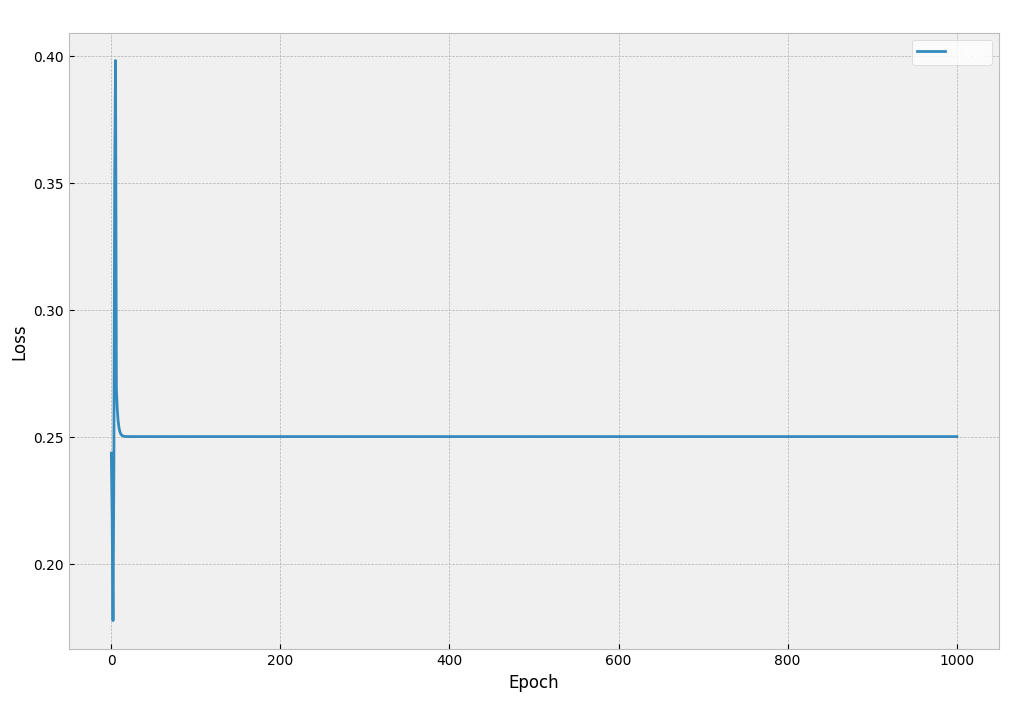

In [21]:
import pandas as pd
plt.rcdefaults()
plt.style.use('bmh')
plt.rcParams.update({
    'figure.facecolor': 'white',    # Hintergrund des gesamten Bildes
    'axes.facecolor': '#f0f0f0',    # Hintergrund der Plot-Fläche (bmh typisch)
    'text.color': 'white',
    'savefig.facecolor': 'white',   # Beim Speichern weißer Hintergrund
    'axes.titleweight': 'bold',     # Titel immer fett
    'legend.frameon': True,         # Legende mit Rahmen
    'legend.facecolor': 'white'     # Legendenhintergrund weiß
})
#sns.set_theme(style="whitegrid")

df = pd.DataFrame(loss_list, columns=['Loss'])
#df.head()
df.plot(figsize=(12, 8))
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()